# EPS HW7
## Andrew Pitts

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 

In [2]:
plt.rcParams['animation.ffmpeg_path']=r'C:\Program Files\ffmpeg\bin\ffmpeg.exe'
from matplotlib.animation import FFMpegWriter
metadata1 = dict(title='Letter N heat equation', artist='Matplotlib')
writer1 = FFMpegWriter(fps=15, metadata=metadata1,bitrate=200000)
metadata2 = dict(title='Letter N heat equation Part 2', artist='Matplotlib')
writer2 = FFMpegWriter(fps=15, metadata=metadata2,bitrate=200000)


### Part 1

In [3]:
x = np.random.rand(1,100)

In [4]:
for i in range(1,99):
    
    if x[0,i]<x[0,i-1] and x[0,i]<x[0,i+1]:
        print(x[0,i],i)

0.04030225970205936 1
0.19785824391870543 3
0.17716591391420133 6
0.4083615272873584 9
0.09118361108810558 15
0.5614816959421342 18
0.07925282638809328 20
0.6009154405175114 22
0.15666979528532832 25
0.44978782852540766 27
0.11725456422193625 30
0.09162253677818188 33
0.031936217166932956 37
0.1927552624860387 41
0.03206836558185011 46
0.03005029738913334 49
0.2468704189126516 51
0.6132778593357308 55
0.6869342188576673 57
0.5228110725442988 60
0.563344051143455 63
0.11393749182468393 65
0.4161057664123168 69
0.3695371184123827 73
0.09175876899923152 76
0.32787356192298034 80
0.030452537789425804 83
0.28903562106503977 85
0.8470557523089619 87
0.24442059145969486 90
0.18550616130567898 93
0.2231948577028139 96


In [5]:
#not sure what 'smallest elements' refers to exactly

### Part 2

In [6]:
N = 51
L = 30
letter = np.zeros((N,N))

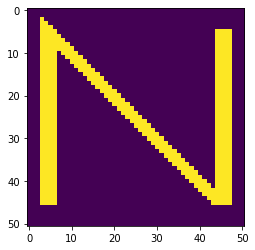

In [7]:
for i in range(5,N-5):
    for j in range(3,7):
        letter[i,j]=1
        
for i in range(5,N-5):
    for j in range(44,48):
        letter[i,j]=1

a=3
for i in range(5,N-5):
    if a<48:
        letter[i,a]=1
        letter[i-1,a]=1
        letter[i-2,a]=1
        letter[i-3,a]=1

        a=a+1
plt.imshow(letter,interpolation='nearest')
plt.show()

In [8]:
T = np.zeros((N+1,N+1))
Tnew = np.zeros((N+1,N+1))

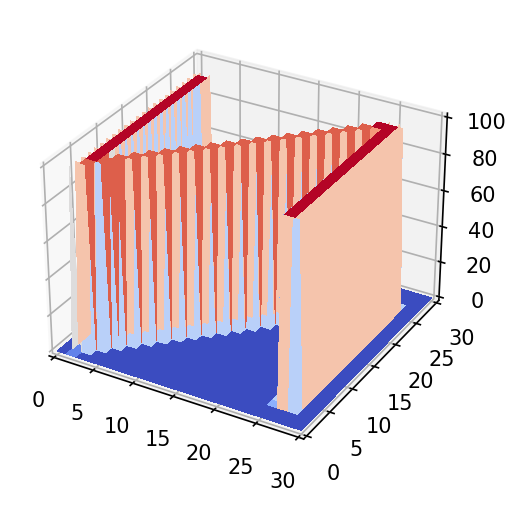

In [9]:
for i in range(0,N):
    for j in range(0,N):
        if letter[i,j]==1:
            T[i,j]=100 

X = np.linspace(0,L,N+1)
Y = np.linspace(0,L,N+1)
X, Y = np.meshgrid(X,Y)
fig = plt.figure(dpi=150)
fig.clear()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,T,cmap=cm.coolwarm,antialiased=False)
ax.set_xlim3d(0, 30)
ax.set_ylim3d(0, 30)
ax.set_zlim3d(0, 100)
plt.draw()
plt.show()

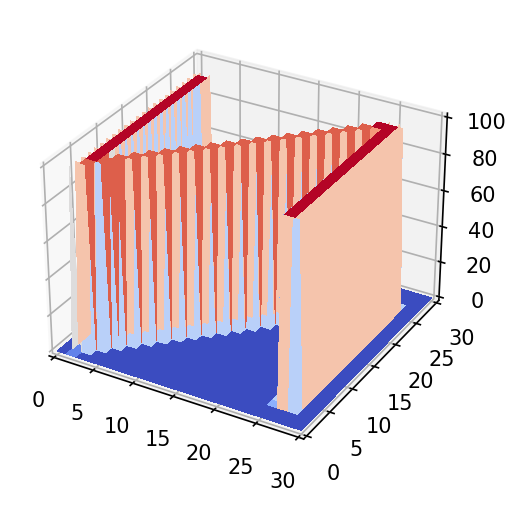

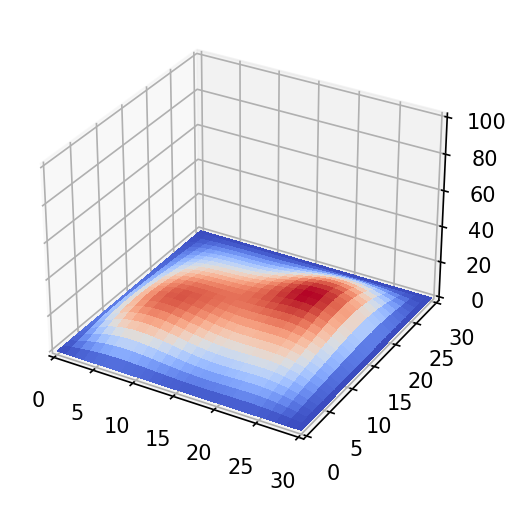

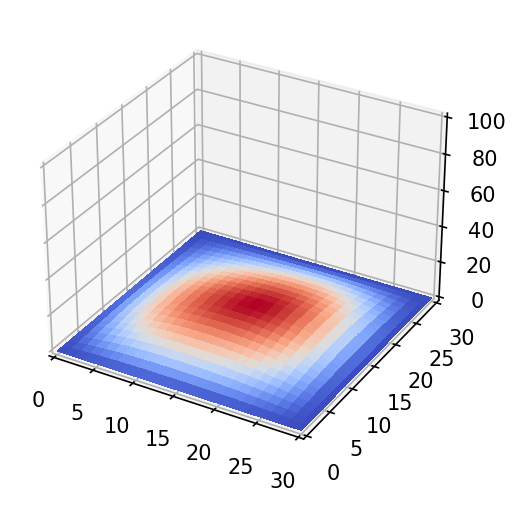

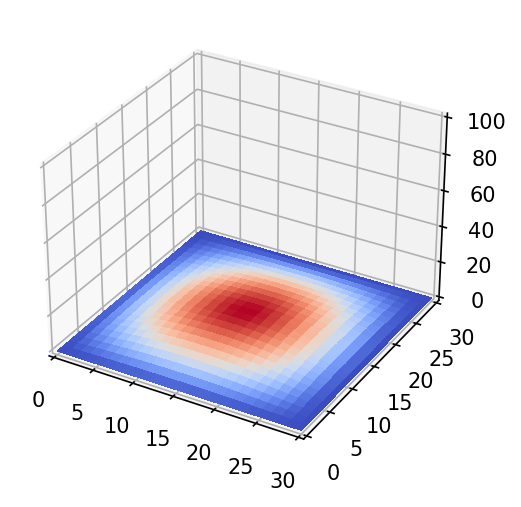

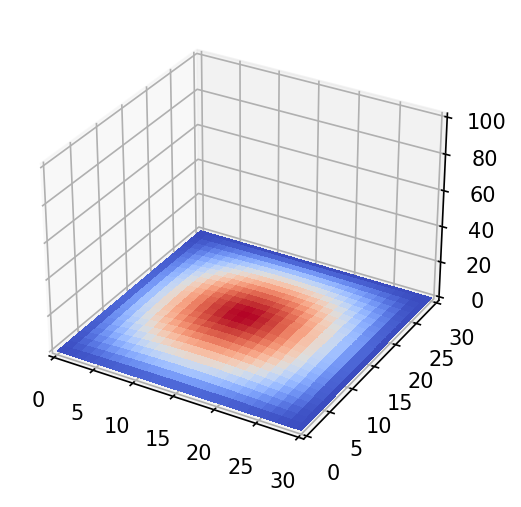

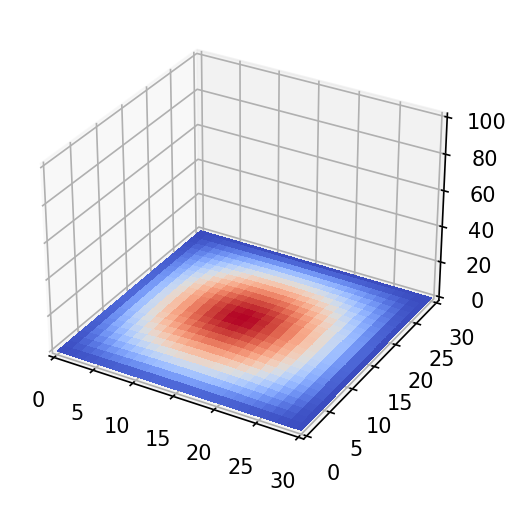

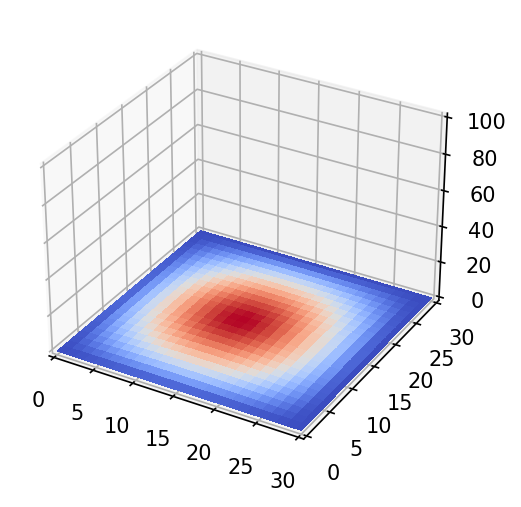

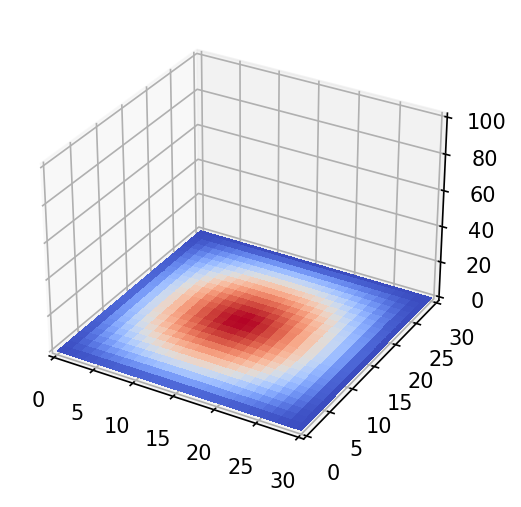

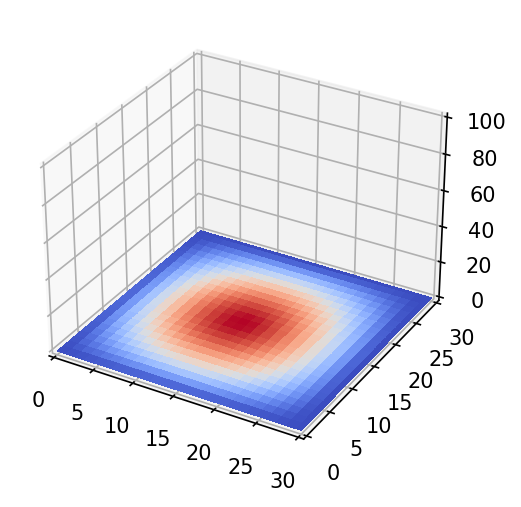

In [10]:
with writer1.saving(fig, "Letter N.mp4", dpi=200):
    for m in range(0,801):
        if m%100 ==0:
            X = np.linspace(0,L,N+1)
            Y = np.linspace(0,L,N+1)
            X, Y = np.meshgrid(X,Y)
            fig = plt.figure(dpi=150)
            fig.clear()
            ax = fig.gca(projection='3d')
            ax.plot_surface(X,Y,T,cmap=cm.coolwarm,antialiased=False)
            ax.set_xlim3d(0, 30)
            ax.set_ylim3d(0, 30)
            ax.set_zlim3d(0, 100)
            plt.draw()
            plt.pause(0.01)
            writer1.grab_frame()

        for i in range(1,N-1):
            Tnew=np.copy(T)
            Tnew[i,j]=(1/4)*(Tnew[i-1,j]+Tnew[i+1,j]+Tnew[i,j-1]+Tnew[i,j+1])
            T=np.copy(Tnew)

            for j in range(1,N-1):
                Tnew=np.copy(T)
                Tnew[i,j]=(1/4)*(Tnew[i,j-1]+Tnew[i,j+1]+Tnew[i-1,j]+Tnew[i+1,j])
                T=np.copy(Tnew)
            
plt.show()

Total original temperature is 48200.0
New total temperature is 48200.0 . Which is 100.0 % of the original.
New total temperature is 47264.75335225594 . Which is 98.0596542577924 % of the original.
New total temperature is 47513.13436931177 . Which is 98.57496757118624 % of the original.
New total temperature is 47599.84500038633 . Which is 98.75486514602973 % of the original.
New total temperature is 47628.34907033811 . Which is 98.81400222061849 % of the original.


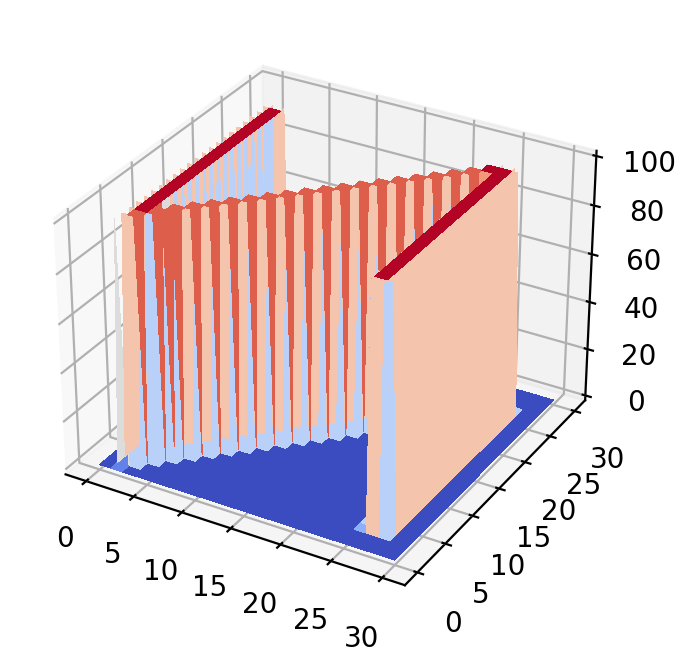

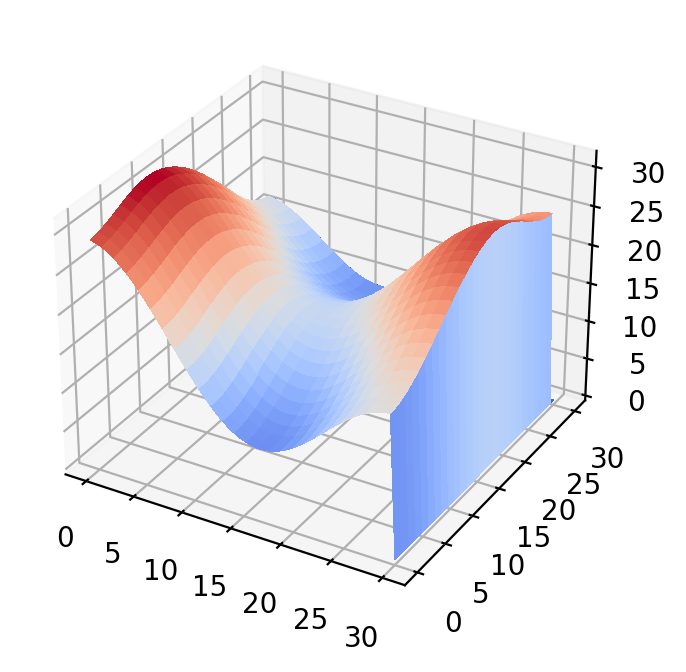

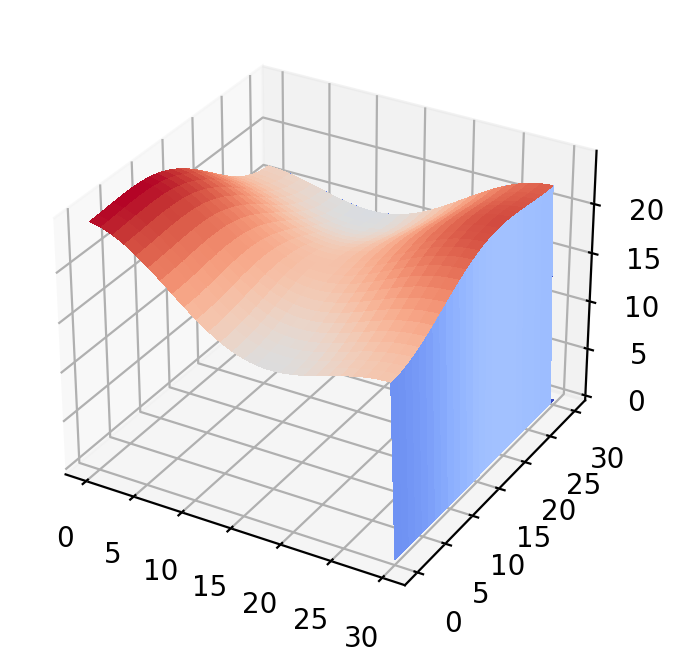

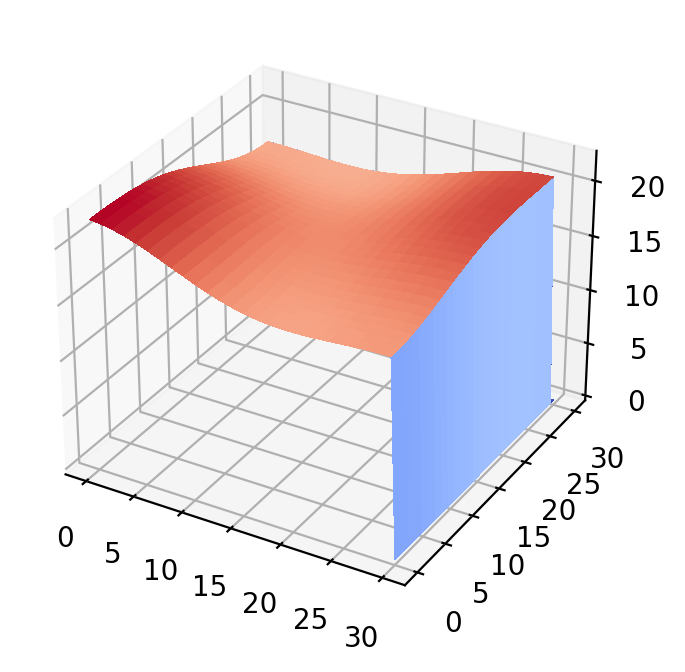

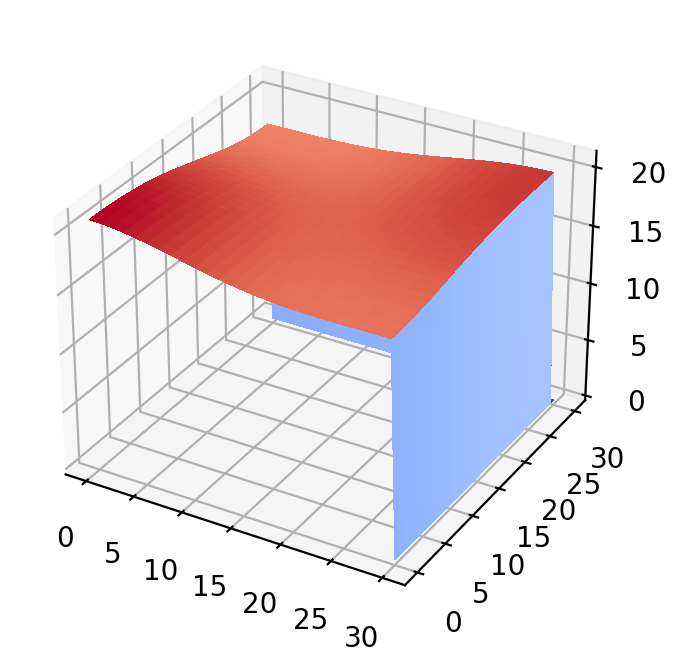

In [11]:
T=np.zeros((N+1,N+1))
Tnew=np.zeros((N+1,N+1))
for i in range(0,N):
    for j in range(0,N):
        if letter[i,j]==1:
            T[i,j]=100 


with writer2.saving(fig, "Letter N pt2.mp4", dpi=200):
    for k in range(0,500):
        if k==0:
            TotalT=0
            for i in range (0,N-1):
                for j in range(0,N-1):
                    TotalT=TotalT+T[i,j]
            print('Total original temperature is',TotalT)

        Tnew=np.copy(T)
        Tnew[0,0] = ( 2.0*Tnew[0,0] + Tnew[1,0] + Tnew[0,1] )/4.0
        Tnew[0,N-1] = ( 2.0*Tnew[0,N-1] + Tnew[1,N-1] + Tnew[0,N-2] )/4.0
        Tnew[N-1,0] = ( 2.0*Tnew[N-1,0] + Tnew[N-2,0] + Tnew[N-1,1] )/4.0
        Tnew[N-1,N-1] = ( 2.0*Tnew[N-1,N-1] + Tnew[N-2,N-1] + Tnew[N-1,N-2] )/4.0
        T=np.copy(Tnew)

        if k==0 or k==125 or k==250 or k==375 or k==500-1:
            X = np.linspace(0, L, N+1) # where n is number of segments
            Y = np.linspace(0, L, N+1)
            X, Y = np.meshgrid(X, Y)
            fig = plt.figure(dpi=200)
            fig.clear()
            ax = fig.gca(projection='3d')
            ax.plot_surface(X, Y, T, cmap=cm.coolwarm, antialiased=False)
            plt.draw()
            writer2.grab_frame()
            #plt.pause(0.05)
            newTotalT=0

            for i in range (0,N-1):
                for j in range(0,N-1):
                    newTotalT=newTotalT+T[i,j]
            print('New total temperature is',newTotalT,'. Which is',(newTotalT/TotalT)*100,'% of the original.')

        for i in range(1,N-1):
            Tnew=np.copy(T)
            Tnew[i,j]=(1/4)*(Tnew[i-1,j]+Tnew[i+1,j]+Tnew[i,j-1]+Tnew[i,j+1])
            Tnew[i,0] = ( Tnew[i,0] + Tnew[i+1,0] + Tnew[i-1,0] + Tnew[i,1] )/4.0   #top right?
            Tnew[i,N-1] = ( Tnew[i,N-1] + Tnew[i+1,N-1] + Tnew[i-1,N-1] + Tnew[i,N-2] )/4.0
            T=np.copy(Tnew)

            for j in range(1,N-1):
                Tnew=np.copy(T)
                Tnew[i,j]=(1/4)*(Tnew[i,j-1]+Tnew[i,j+1]+Tnew[i-1,j]+Tnew[i+1,j])
                Tnew[0,j] = ( Tnew[0,j] + Tnew[0,j+1] + Tnew[0,j-1] + Tnew[1,j] )/4.0
                Tnew[N-1,j] = ( Tnew[N-1,j] + Tnew[N-1,j+1] + Tnew[N-1,j-1] + Tnew[N-2,j] )/4.0
                T=np.copy(Tnew)

plt.show()

In [13]:
#I can't get the mp4 files to work properly, it's only saving 1 frame :(